In [11]:
import qiskit as q
from qiskit.tools.monitor import job_monitor
%matplotlib inline

# Start from the bit level
circuit = q.QuantumCircuit(2,2) #2 qbits and 2 normal bits

# NOT Gate
circuit.x(0)

# Controlled NOT. Flips 2nd Qbit iff frst qbit is a 1
circuit.cx(0,1)

circuit.measure([0,1], [0,1])

circuit.draw()

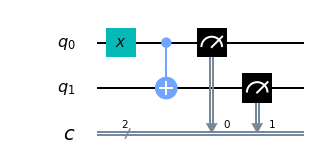

In [12]:
circuit.draw(output='mpl')


In [13]:
from qiskit import IBMQ

IBMQ.save_account(open("token", "r").read())

IBMQ.load_account()

Credentials already present. Set overwrite=True to overwrite.
c:\users\prajw\.conda\envs\qiskitprojects\lib\site-packages\qiskit\providers\models\backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")
    



ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 19 queued and 5 qubits
ibmq_16_melbourne has 4 queued and 14 qubits
ibmq_vigo has 34 queued and 5 qubits
ibmq_ourense has 24 queued and 5 qubits
ibmq_london has 21 queued and 5 qubits
ibmq_burlington has 15 queued and 5 qubits
ibmq_essex has 16 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits


In [15]:

backend = provider.get_backend("ibmq_burlington")

job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


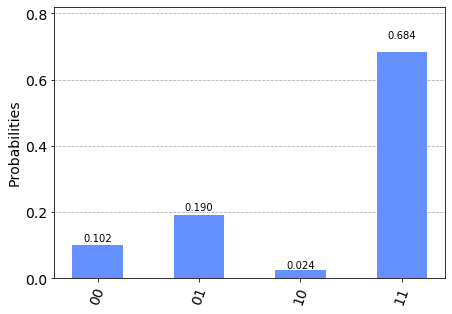

In [16]:
from qiskit.visualization import plot_histogram


result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])


In [17]:
backend = provider.get_backend("ibmq_qasm_simulator")

circuit = q.QuantumCircuit(2,2)

circuit.h(0)

circuit.cx(0,1)
circuit.measure([0,1], [0,1])
circuit.draw()

In [18]:
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


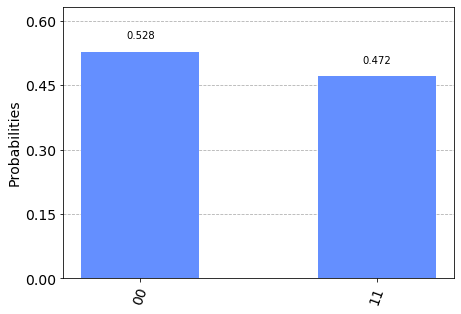

In [19]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])



In [20]:
from qiskit import Aer

sim_backend = Aer.get_backend("qasm_simulator")

for backend in Aer.backends():
    print(backend)


qasm_simulator
statevector_simulator
unitary_simulator


In [21]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)



Job Status: job has successfully run


In [22]:
result = job.result()
counts = result.get_counts(circuit)



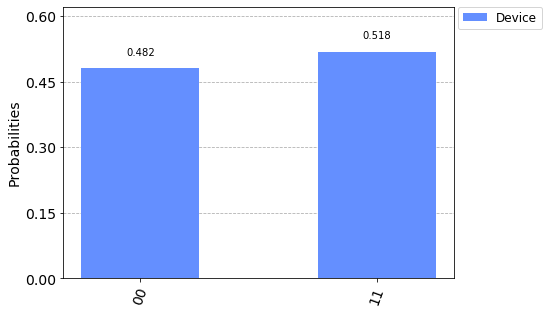

In [23]:
plot_histogram([counts], legend=['Device'])
